In [1]:
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns',None)
%matplotlib inline
sns.set(style='darkgrid')

In [2]:
train_perf = pd.read_csv("trainperf.csv")
test_perf = pd.read_csv("testperf.csv")

train_prevloans = pd.read_csv("trainprevloans.csv")
test_prevloans = pd.read_csv("testprevloans.csv")

train_demographics = pd.read_csv("traindemographics.csv")
test_demographics = pd.read_csv("testdemographics.csv")

In [3]:
train_perf.shape,train_prevloans.shape,train_demographics.shape

((4368, 10), (18183, 12), (4346, 9))

In [4]:
#  train_perf.info()
#  There is no missing values for all features except The feature "referredby" has 3781 missing values

In [5]:
# train_prevloans.info() 
#  There is no missing values for all features except The feature "referredby" has 17 157 missing values

In [6]:
# train_demographics.info()
#  There is no missing values for all features except three features "bank_branch_clients" with 4292 missing values ,
# "employment_status_clients" with 645 missing values,"level_of_education_clients" with 3759 missing values

In [7]:
train_perf['good_bad_flag']=train_perf['good_bad_flag'].map({'Good':1,'Bad':0})

In [8]:
train_joined=pd.merge(train_perf,train_demographics.drop_duplicates(),on='customerid',how='left')
test_joined=pd.merge(test_perf,test_demographics.drop_duplicates(),on='customerid',how='left')

In [9]:
# train_joined.nunique()

In [10]:
train_joined.head()
print(train_joined.shape)

(4368, 18)


In [11]:
grouped_train=train_prevloans.groupby('customerid')[["loanamount", "totaldue", "termdays"]]\
                        .agg(['mean']).reset_index()
grouped_test=test_prevloans.groupby('customerid')[["loanamount", "totaldue", "termdays"]]\
                        .agg(['mean']).reset_index()

In [12]:
grouped_train.shape

(4359, 4)

In [13]:
joined=pd.merge(train_joined,grouped_train,on='customerid',how='left')
joined_test=pd.merge(test_joined,grouped_test,on='customerid',how='left')

C:\Users\USER\AppData\Local\Temp\ipykernel_16272\2205235321.py:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  joined=pd.merge(train_joined,grouped_train,on='customerid',how='left')
C:\Users\USER\AppData\Local\Temp\ipykernel_16272\2205235321.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  joined=pd.merge(train_joined,grouped_train,on='customerid',how='left')
C:\Users\USER\AppData\Local\Temp\ipykernel_16272\2205235321.py:2: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  joined_test=pd.merge(test_joined,grouped_test,on='customerid',how='left')
C:\Users\USER\AppData\Local\Temp\ipykernel_16272\2205235321.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  joined_t

In [14]:
joined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4368 entries, 0 to 4367
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  4368 non-null   object 
 1   systemloanid                4368 non-null   int64  
 2   loannumber                  4368 non-null   int64  
 3   approveddate                4368 non-null   object 
 4   creationdate                4368 non-null   object 
 5   loanamount                  4368 non-null   float64
 6   totaldue                    4368 non-null   float64
 7   termdays                    4368 non-null   int64  
 8   referredby                  587 non-null    object 
 9   good_bad_flag               4368 non-null   int64  
 10  birthdate                   3269 non-null   object 
 11  bank_account_type           3269 non-null   object 
 12  longitude_gps               3269 non-null   float64
 13  latitude_gps                3269 

In [15]:
joined_test

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,"(loanamount, mean)","(totaldue, mean)","(termdays, mean)"
0,8a858899538ddb8e015390510b321f08,301998974,4,40:48.0,39:35.0,10000,12250.0,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8666.666667,10966.666667,25.000000
1,8a858959537a097401537a4e316e25f7,301963615,10,43:40.0,42:34.0,40000,44000.0,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23888.888889,27600.000000,31.666667
2,8a8589c253ace09b0153af6ba58f1f31,301982236,6,15:11.0,15:04.0,20000,24500.0,30,NaN,1981-09-05 00:00:00.000000,Savings,3.227945,6.586668,UBA,NaN,Permanent,NaN,13000.000000,15935.000000,27.000000
3,8a858e095aae82b7015aae86ca1e030b,301971730,8,00:54.0,00:49.0,30000,34500.0,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17142.857143,19342.857143,17.142857
4,8a858e225a28c713015a30db5c48383d,301959177,4,04:33.0,04:27.0,20000,24500.0,30,NaN,1975-08-25 00:00:00.000000,Savings,5.248368,13.059864,UBA,NaN,Permanent,NaN,10000.000000,12500.000000,25.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,8a858fb45bb59c21015bb88a191f58f2,301991141,3,47:02.0,46:53.0,10000,11500.0,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.000000,11500.000000,15.000000
1446,8a858fcb5b00cc54015b0253ced26a5f,301963018,3,00:45.0,04:05.0,10000,13000.0,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.000000,11500.000000,15.000000
1447,8a858fde56eb02280156f59b976d46c0,301994653,9,09:40.0,09:33.0,40000,48000.0,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18125.000000,22075.000000,37.500000
1448,8a858e10570f2d65015717fcfec44996,301961483,14,47:54.0,46:49.0,60000,68100.0,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30384.615385,36084.615385,54.230769


## Dealing with Missing values

In [16]:
num_col=joined_test.select_dtypes(exclude='object').columns
obj_col=joined_test.select_dtypes(include='object').columns

In [17]:
LMV=['bank_branch_clients','level_of_education_clients','referredby'] #object features that have a lot of missing values 

In [18]:
from sklearn.impute import SimpleImputer
impute=SimpleImputer(strategy='mean')
num=test_joined.select_dtypes(exclude='object').columns
train_joined[num]=impute.fit_transform(train_joined[num])
test_joined[num]=impute.transform(test_joined[num])

In [19]:
from sklearn.impute import SimpleImputer
impute=SimpleImputer(strategy='most_frequent')
obj = joined_test.select_dtypes(include='object').drop('referredby', axis=1).columns
joined[obj]=impute.fit_transform(joined[obj])
joined_test[obj]=impute.transform(joined_test[obj])


In [20]:
train_joined.loc[~train_joined.referredby.isna(), "referredby"] = str(1)
train_joined["referredby"] = train_joined["referredby"].astype(float).fillna(0).astype(int)

test_joined.loc[~test_joined.referredby.isna(), "referredby"] = str(1)
test_joined["referredby"] = test_joined["referredby"].astype(float).fillna(0).astype(int)

In [21]:
joined

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,"(loanamount, mean)","(totaldue, mean)","(termdays, mean)"
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,1,1972-01-15 00:00:00.000000,Other,3.432010,6.433055,Diamond Bank,OGBA,Permanent,Post-Graduate,18181.818182,22081.818182,30.0
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,NaN,1,1985-08-23 00:00:00.000000,Savings,3.885298,7.320700,GT Bank,"DUGBE,IBADAN",Permanent,Graduate,NaN,NaN,NaN
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN,1,1984-09-18 00:00:00.000000,Other,11.139350,10.292041,EcoBank,OGBA,Permanent,Graduate,10000.000000,11750.000000,17.5
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,NaN,1,1977-10-10 00:00:00.000000,Savings,3.985770,7.491708,First Bank,OGBA,Permanent,Graduate,10000.000000,12250.000000,22.5
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,NaN,1,1986-09-07 00:00:00.000000,Other,7.457913,9.076574,GT Bank,OGBA,Permanent,Primary,18750.000000,23550.000000,37.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4363,8a858e6d58b0cc520158beeb14b22a5a,302003163,2,2017-07-30 09:19:42.000000,2017-07-30 08:18:30.000000,10000.0,13000.0,30,NaN,0,1982-08-08 00:00:00.000000,Savings,NaN,NaN,GT Bank,OGBA,Permanent,Graduate,10000.000000,13000.000000,30.0
4364,8a858ee85cf400f5015cf44ab1c42d5c,301998967,2,2017-07-27 15:35:47.000000,2017-07-27 14:35:40.000000,10000.0,13000.0,30,NaN,0,1989-12-04 00:00:00.000000,Savings,4.607358,8.460608,FCMB,OGBA,Permanent,Graduate,10000.000000,13000.000000,30.0
4365,8a858f365b2547f3015b284597147c94,301995576,3,2017-07-25 16:25:57.000000,2017-07-25 15:24:47.000000,10000.0,11500.0,15,NaN,0,1989-11-21 00:00:00.000000,Savings,3.976842,7.409129,First Bank,OGBA,Permanent,Graduate,10000.000000,11500.000000,15.0
4366,8a858f935ca09667015ca0ee3bc63f51,301977679,2,2017-07-14 13:50:27.000000,2017-07-14 12:50:21.000000,10000.0,13000.0,30,8a858eda5c8863ff015c9dead65807bb,0,1990-06-11 00:00:00.000000,Savings,3.986089,7.386796,Skye Bank,OGBA,Permanent,Graduate,10000.000000,13000.000000,30.0


# EDA

C:\Users\USER\AppData\Local\Temp\ipykernel_16272\121597519.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(joined.corr(),annot=True,cmap='YlGnBu')


<AxesSubplot: >

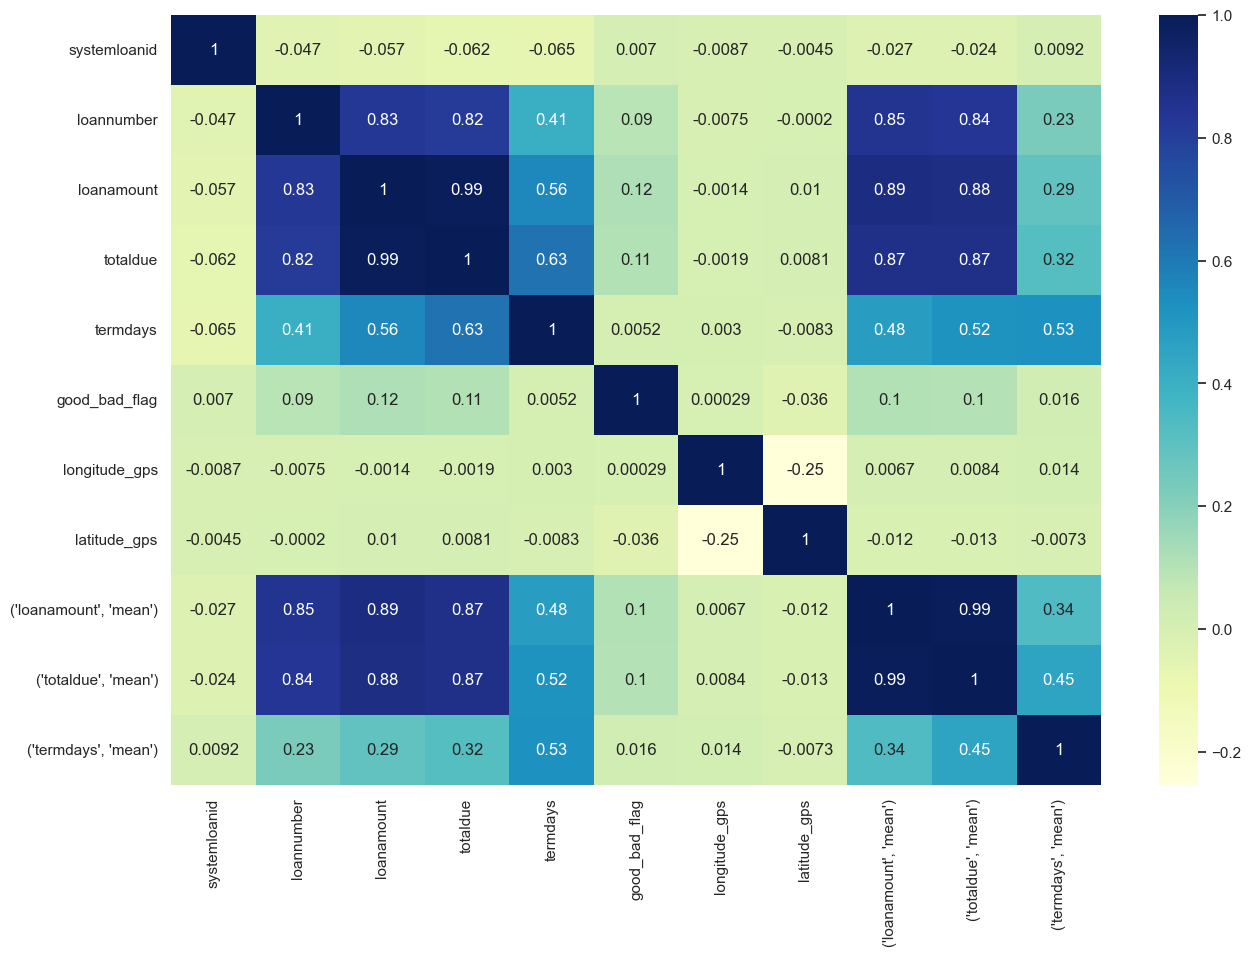

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(joined.corr(),annot=True,cmap='YlGnBu')

##### There is a high correlation between the features ::
##### "loanamount" , "loannumber" with the value of 0.83
##### "loanamount" , "totaldue" with the value of 0.99
##### "totaldue" , "loannumber" with the value of 0.82
##### Those high correlation values can informe us about two things whether ::

##### 1) Strong Linear Relationship:
##### Features with high correlation coefficients move almost perfectly together. 
##### When one feature increases, the other tends to increase predictably, and vice versa. 
##### This suggests multicollinearity, which can affect model performance. Removing one of the features may simplify the model and improve its generalization.
##### Feature Engineering Opportunities:

##### 2) High correlations reveal strong relationships between features, suggesting underlying patterns or dependencies. 
##### This presents opportunities for feature engineering, where transformations or combinations of correlated features can capture complex relationships, enhancing predictive power. 
##### Further exploration is needed to determine the significance of these relationships.

In [23]:
obj_col

Index(['customerid', 'approveddate', 'creationdate', 'referredby', 'birthdate',
       'bank_account_type', 'bank_name_clients', 'bank_branch_clients',
       'employment_status_clients', 'level_of_education_clients'],
      dtype='object')

In [24]:
joined.termdays.info()
# joined.info()

<class 'pandas.core.series.Series'>
Int64Index: 4368 entries, 0 to 4367
Series name: termdays
Non-Null Count  Dtype
--------------  -----
4368 non-null   int64
dtypes: int64(1)
memory usage: 68.2 KB


In [25]:
joined['level_of_education_clients'].unique()

array(['Post-Graduate', 'Graduate', 'Primary', 'Secondary'], dtype=object)

In [26]:
import matplotlib.pyplot as plt
def props(df, string):
    col=string
    ct= df[col].value_counts(dropna=False).sort_index()
    plt.figure(figsize=(8, 8))
    plt.pie(ct, labels=ct.index, autopct='%1.1f%%', startangle=0)
    plt.title(col)
    plt.show()
def visualize(df, string1, string2):
    col=string1
    ct= df[col].value_counts(dropna=False).sort_index()
    grouped_data = df.groupby([string1, string2]).size().unstack(fill_value=0)
    proportions = grouped_data.div(grouped_data.sum(axis=1), axis=0)
    fig, ax = plt.subplots(figsize=(20, 12))
    proportions.plot(kind='bar', stacked=True, ax=ax)
    plt.xlabel(string1)
    plt.ylabel('Proportion')
    plt.legend(title=string2, bbox_to_anchor=(1, 1))
    plt.show()

<Figure size 1200x800 with 0 Axes>

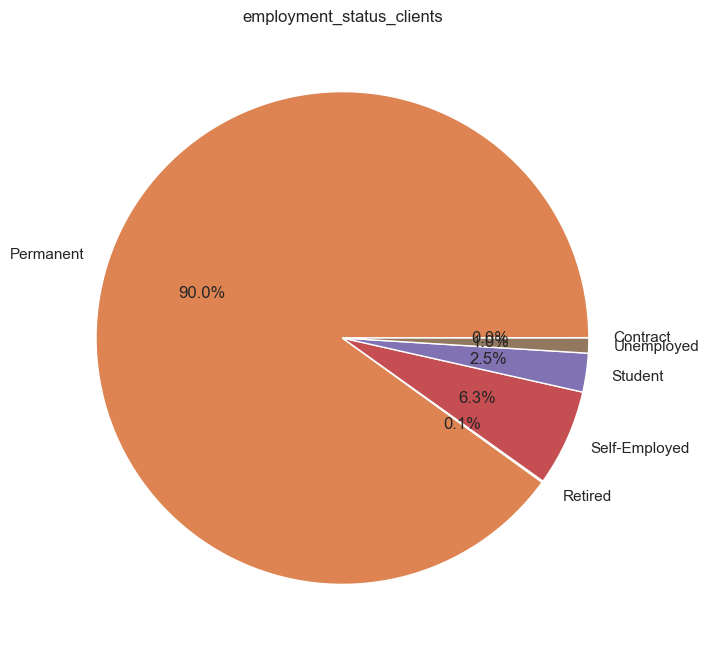

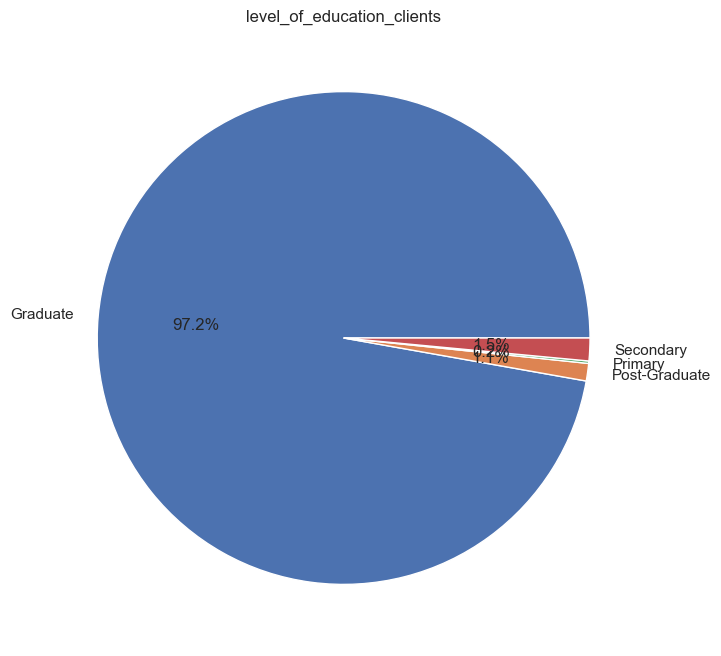

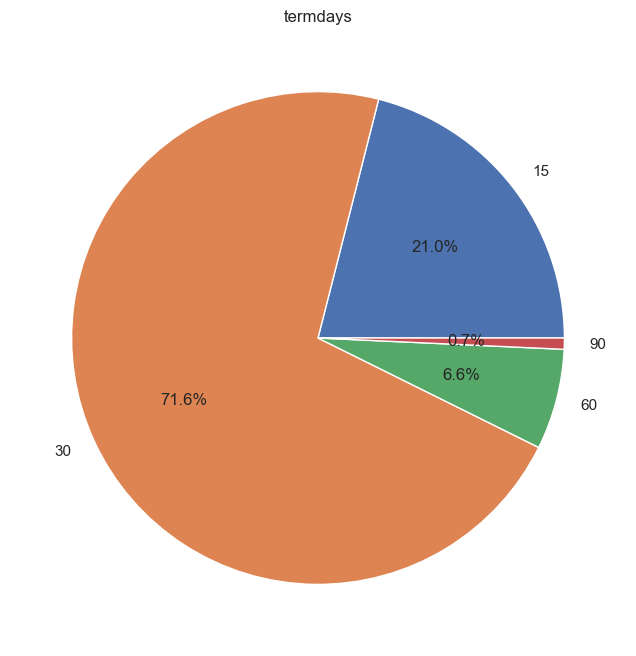

In [27]:
plt.figure(figsize=(12, 8))
props(joined, 'employment_status_clients')
props(joined, 'level_of_education_clients')
props(joined, 'termdays')

In [28]:
# sns.boxplot( y=joined["loannumber"],x=joined['termdays'],hue=joined['level_of_education_clients'])

### Chi student test

In [29]:
 from scipy.stats import chi2_contingency
def chi_squared_test(df, input_var, target_var, significance_level=0.05):
    contingency_table = pd.crosstab(df[input_var], df[target_var])
    chi2, p, _, _ = chi2_contingency(contingency_table)

    if p < significance_level:
        print(f'\033[32m{input_var} has a significant relationship with the ', target_var ,' variable.\033[0m')
    else:
        print(f'\033[31m{input_var} does not have a significant relationship with the', target_var ,'  variable.\033[0m')

In [30]:
for c in joined.columns:
    chi_squared_test(joined, c, 'good_bad_flag')

customerid does not have a significant relationship with the good_bad_flag   variable.
systemloanid does not have a significant relationship with the good_bad_flag   variable.
loannumber has a significant relationship with the  good_bad_flag  variable.
approveddate does not have a significant relationship with the good_bad_flag   variable.
creationdate does not have a significant relationship with the good_bad_flag   variable.
loanamount has a significant relationship with the  good_bad_flag  variable.
totaldue has a significant relationship with the  good_bad_flag  variable.
termdays does not have a significant relationship with the good_bad_flag   variable.
referredby does not have a significant relationship with the good_bad_flag   variable.
good_bad_flag has a significant relationship with the  good_bad_flag  variable.
birthdate does not have a significant relationship with the good_bad_flag   variable.
bank_account_type has a significant relationship with the  good_bad_flag  varia

#### We can see that according to Chi-squared test there only 4 features that have significant relationship with 
#### the target "good_bad_flag" which are : "loannumber"--"loanamount"--"bank_account_type"--"totaldue"

In [31]:
for c in joined.columns:
    chi_squared_test(joined, c, 'loanamount')

customerid does not have a significant relationship with the loanamount   variable.
systemloanid does not have a significant relationship with the loanamount   variable.
loannumber has a significant relationship with the  loanamount  variable.
approveddate does not have a significant relationship with the loanamount   variable.
creationdate does not have a significant relationship with the loanamount   variable.
loanamount has a significant relationship with the  loanamount  variable.
totaldue has a significant relationship with the  loanamount  variable.
termdays has a significant relationship with the  loanamount  variable.
referredby has a significant relationship with the  loanamount  variable.
good_bad_flag has a significant relationship with the  loanamount  variable.
birthdate does not have a significant relationship with the loanamount   variable.
bank_account_type has a significant relationship with the  loanamount  variable.
longitude_gps does not have a significant relations

#### We can see that according to Chi-squared test there only 10 features that have significant relationship with 
#### the target "loanamount" which are : "loannumber"--"good_bad_flag"--"bank_account_type"--"totaldue"--"employment_status_clients"--"level_of_education_clients"-

<AxesSubplot: xlabel='termdays', ylabel='loanamount'>

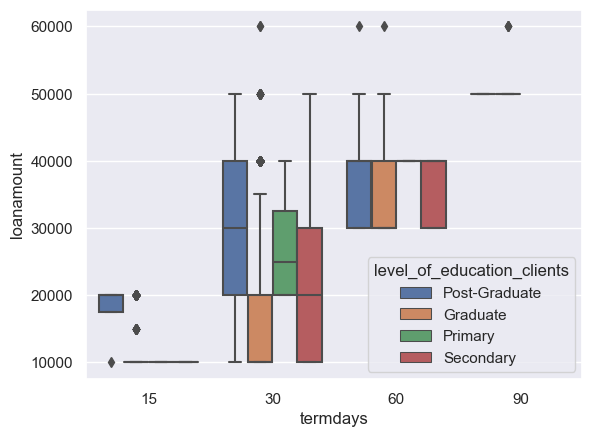

In [32]:
sns.boxplot( y=joined["loanamount"],x=joined['termdays'],hue=joined['level_of_education_clients'])

###### Upon analyzing the distribution of loan amounts based on term days, we discovered insightful patterns. Approximately half of the clients, whose loans must be repaid within 15 months, exhibit loan amounts ranging between 17,500 and 20,000 units, with the majority being post-graduates.
###### For loans with a term of 30 months, the distribution shifts slightly. About half of the post-graduates' loans fall within the range of 20,000 to 40,000 units, while graduated clients generally have loans below 20,000 units. Notably, there are outliers in this category.
###### In the case of loans with a 60-month term, a consistent trend emerges across all education levels. Roughly 50% of loans, regardless of educational background, fall between 30,000 and 40,000 units, with occasional outliers. However, loans for primary education show a deviation, clustering between 20,000 and 32,500 units.

<AxesSubplot: xlabel='termdays', ylabel='loanamount'>

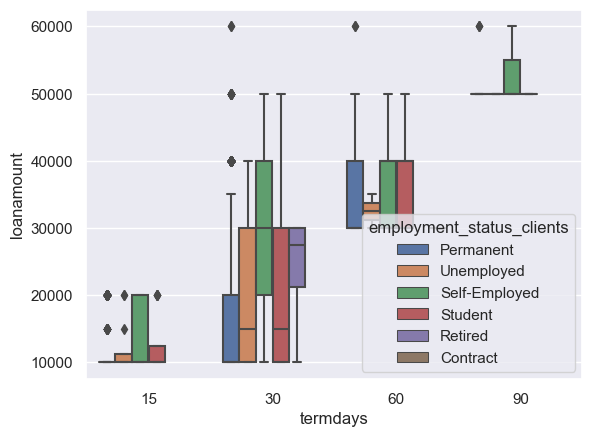

In [33]:
sns.boxplot( y=joined["loanamount"],x=joined['termdays'],hue=joined['employment_status_clients'])

###### We did the same thing as before , we have just  pivoted to exploring the employment status of clients instead of their level of education.
###### Upon scrutinizing the loan amount distribution based on term days and clients' employment statuses, intriguing insights emerged. For loans with a 15-month repayment term, roughly half of the clients fall under the self-employed category, with loan amounts spanning from 1,000 to 20,000 units. Notably, students and unemployed individuals tend to have loans below 12,500 units, with occasional outliers.

###### With a term of 30 months, a nuanced shift in distribution occurs. Approximately half of the loans held by permanent employees range from 10,000 to 20,000 units, while students and unemployed individuals see loan amounts reaching up to 30,000 units, maintaining a consistent median. Noteworthy is the range of loan amounts for self-employed individuals, which spans from 20,000 to 40,000 units, and retirees typically receive loans between 20,000 and 30,000 units.

###### Moving to a 60-month term, a uniform trend emerges across all employment statuses. Roughly 50% of loans, regardless of employment status, fall within the 30,000 to 40,000 unit range, punctuated by occasional outliers. However, loans designated for primary education exhibit a slight deviation, clustering between 31,000 and 32,500 units.

###### For a 90-month term, only self-employed individuals are observed, receiving loans ranging from 50,000 to 55,000 units. This distinct pattern highlights the higher loan amounts sought by self-employed clients for extended-term commitments.

<AxesSubplot: xlabel='loanamount', ylabel='termdays'>

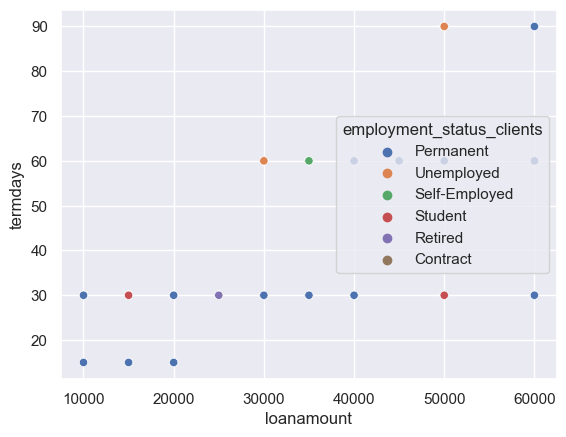

In [34]:
sns.scatterplot(data=joined, x="loanamount", y="termdays",hue="employment_status_clients")

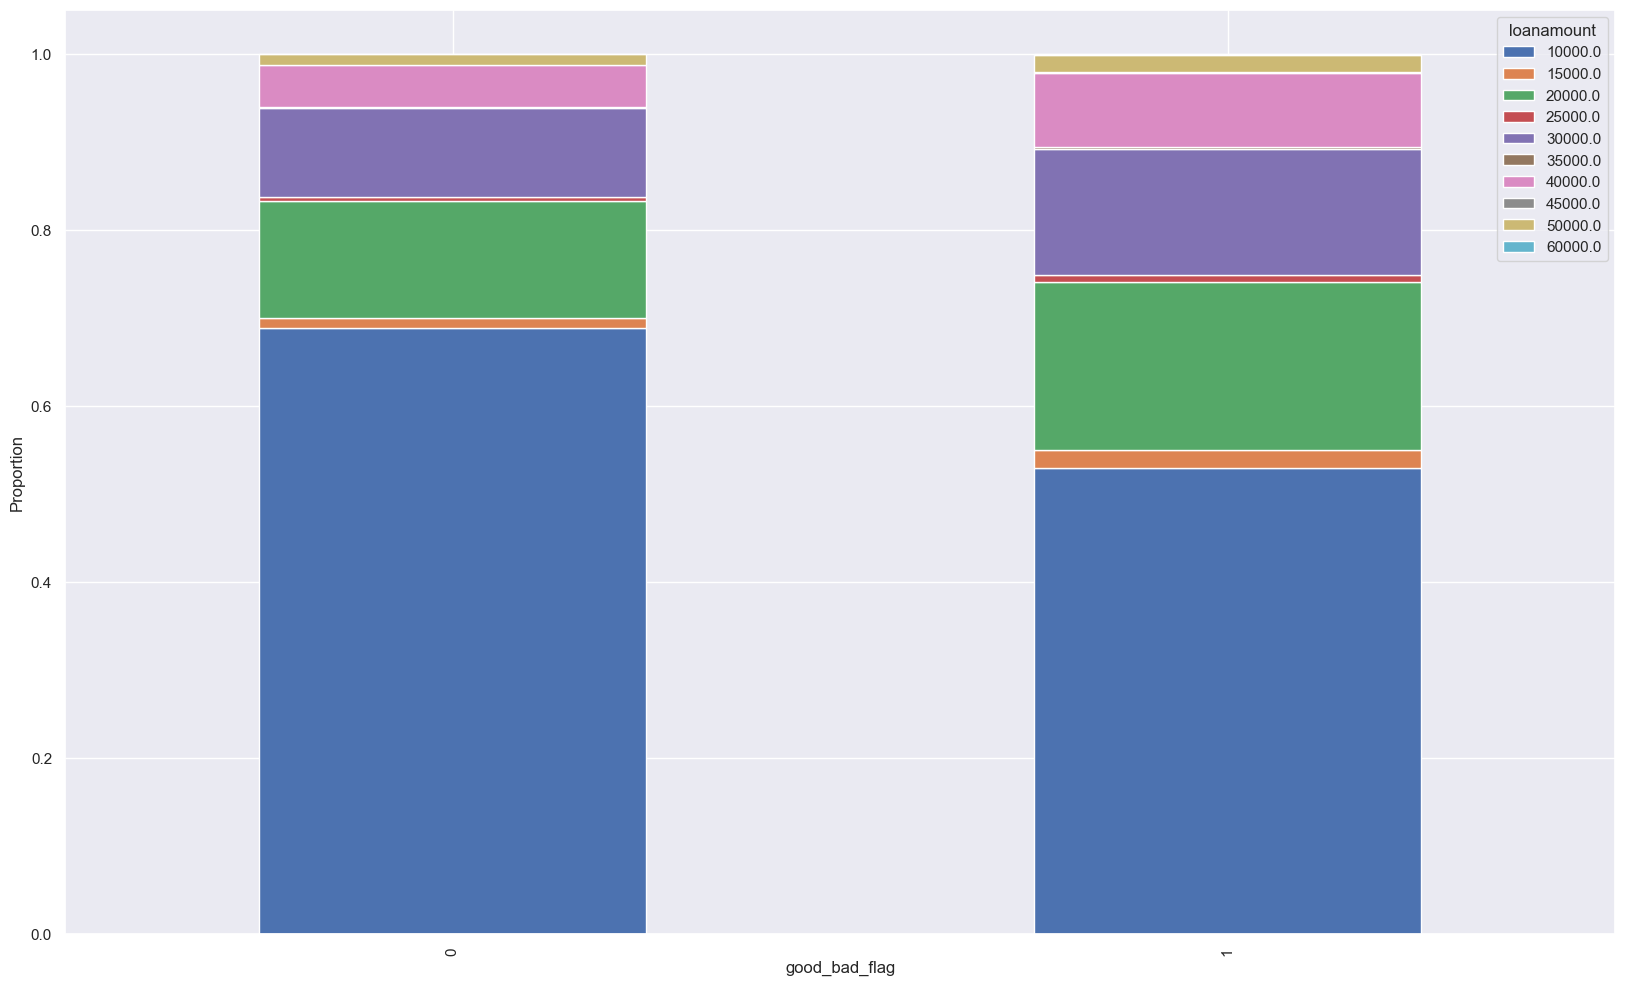

In [35]:
visualize(joined, 'good_bad_flag','loanamount')

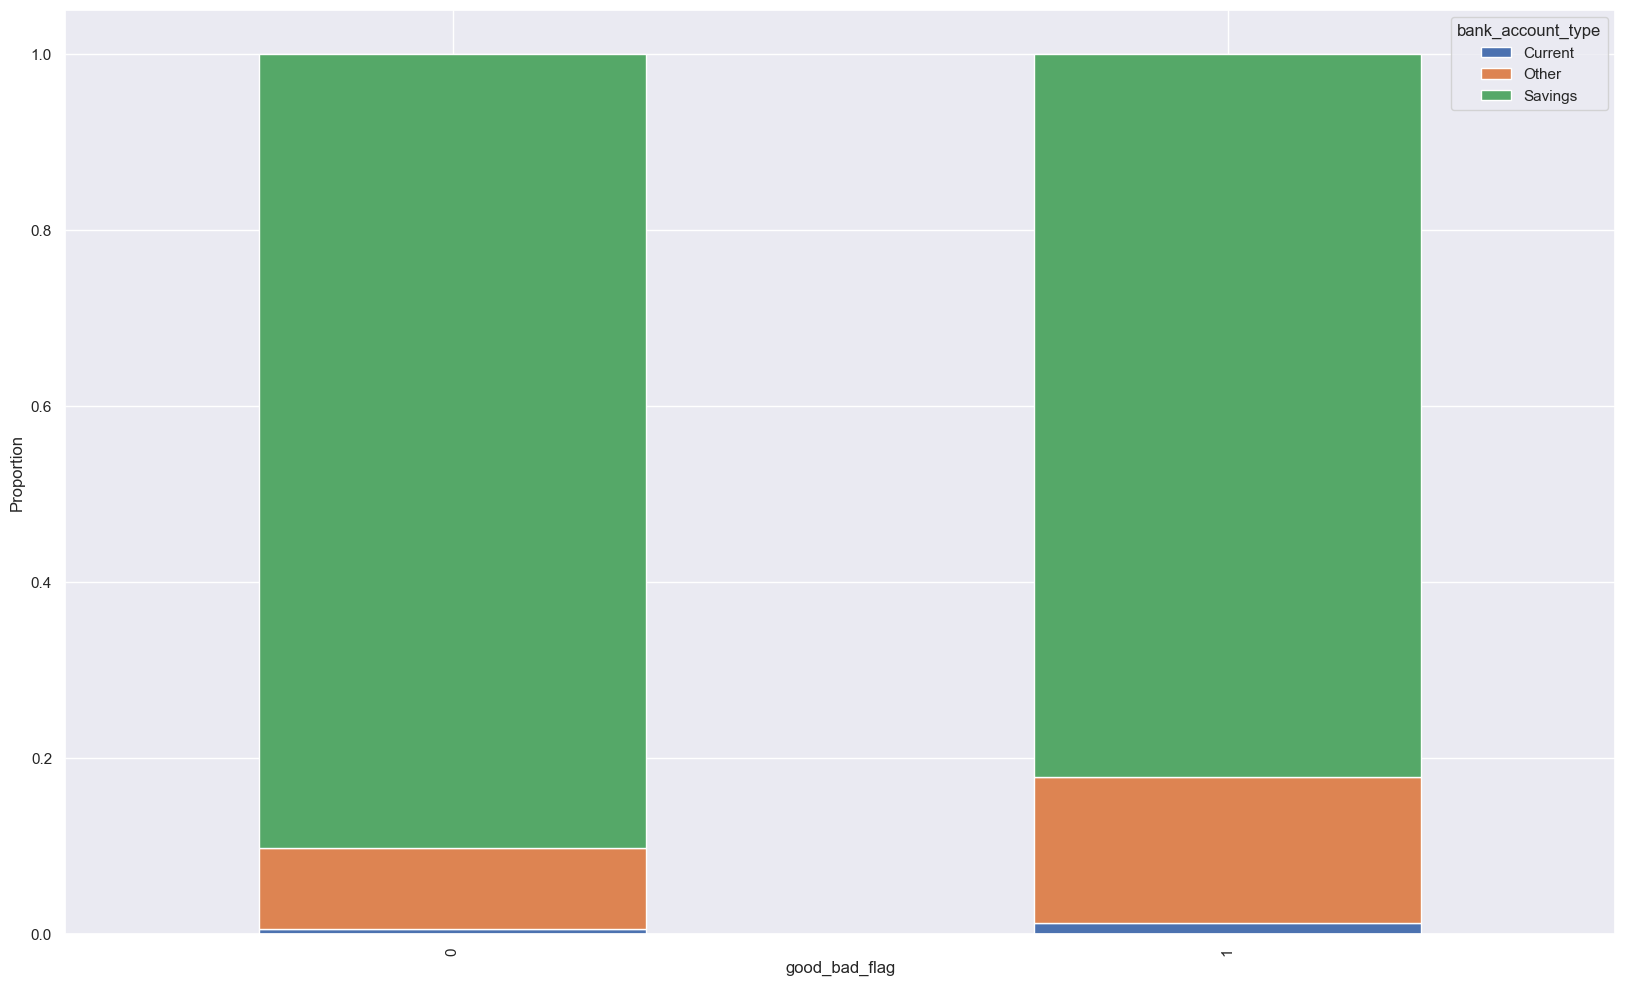

In [36]:
visualize(joined, 'good_bad_flag','bank_account_type')

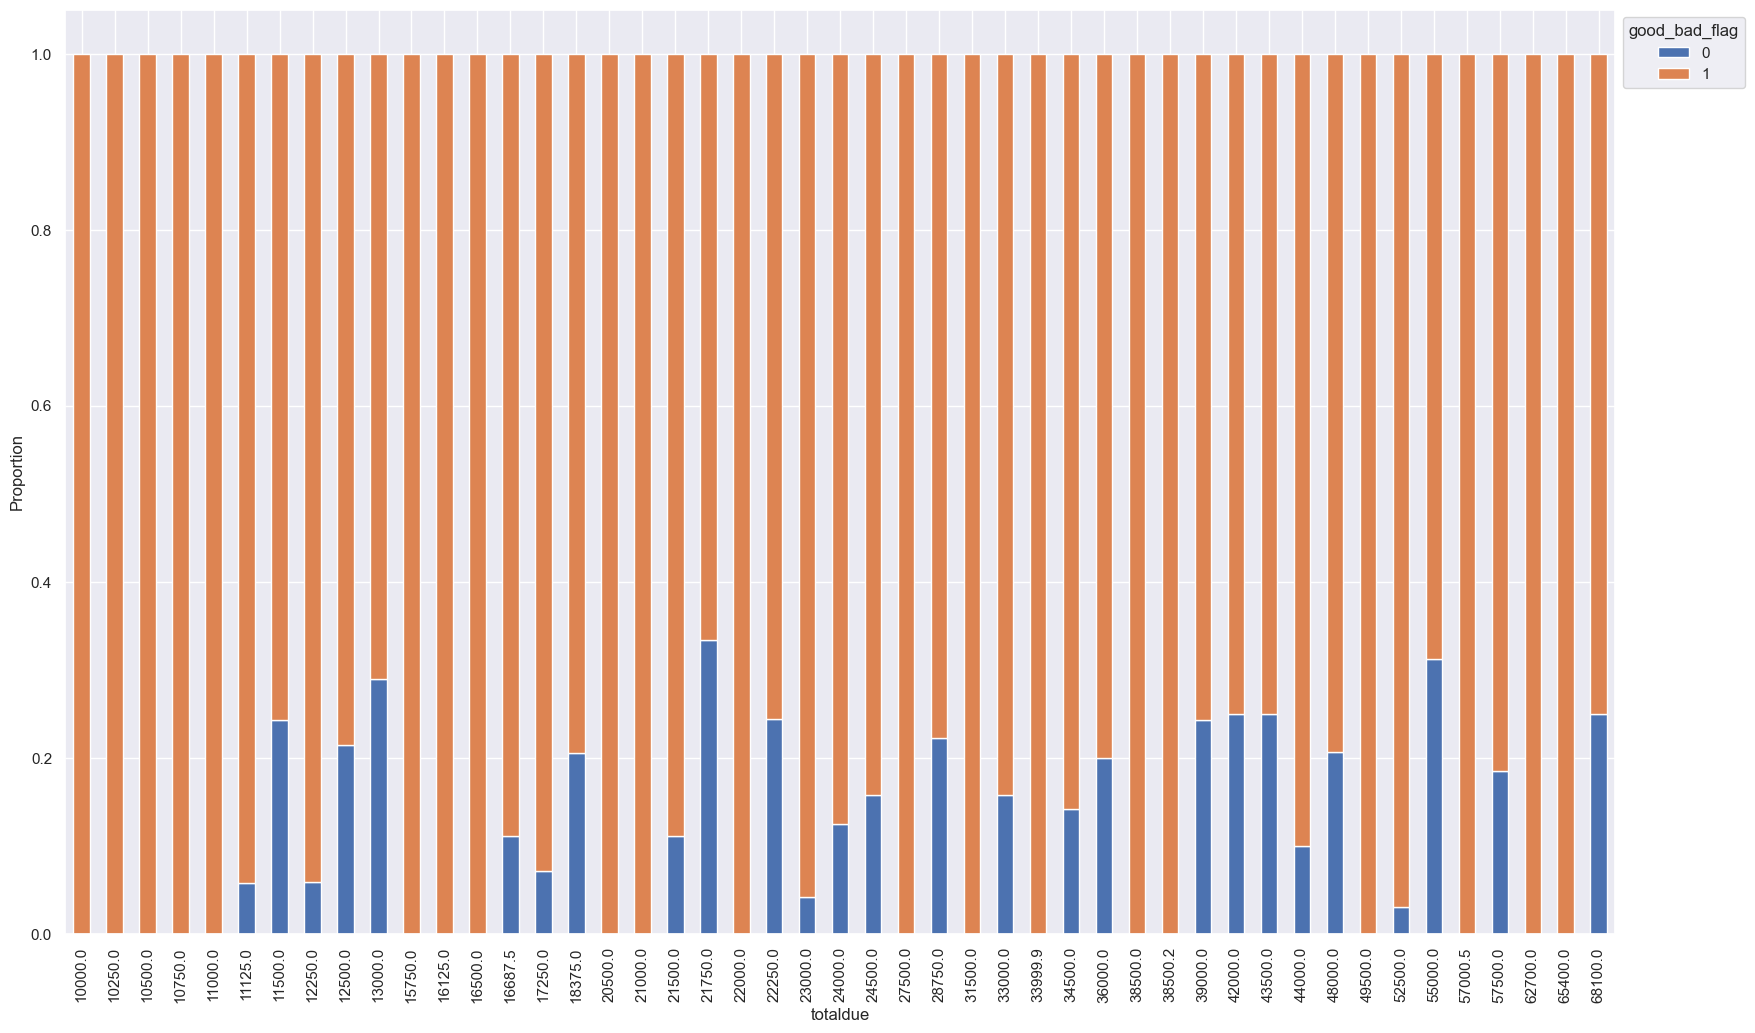

In [37]:
visualize(joined, 'totaldue','good_bad_flag')

array([[<AxesSubplot: title={'center': 'systemloanid'}>,
        <AxesSubplot: title={'center': 'loannumber'}>,
        <AxesSubplot: title={'center': 'loanamount'}>],
       [<AxesSubplot: title={'center': 'totaldue'}>,
        <AxesSubplot: title={'center': 'termdays'}>,
        <AxesSubplot: title={'center': 'good_bad_flag'}>],
       [<AxesSubplot: title={'center': 'longitude_gps'}>,
        <AxesSubplot: title={'center': 'latitude_gps'}>,
        <AxesSubplot: title={'center': "('loanamount', 'mean')"}>],
       [<AxesSubplot: title={'center': "('totaldue', 'mean')"}>,
        <AxesSubplot: title={'center': "('termdays', 'mean')"}>,
        <AxesSubplot: >]], dtype=object)

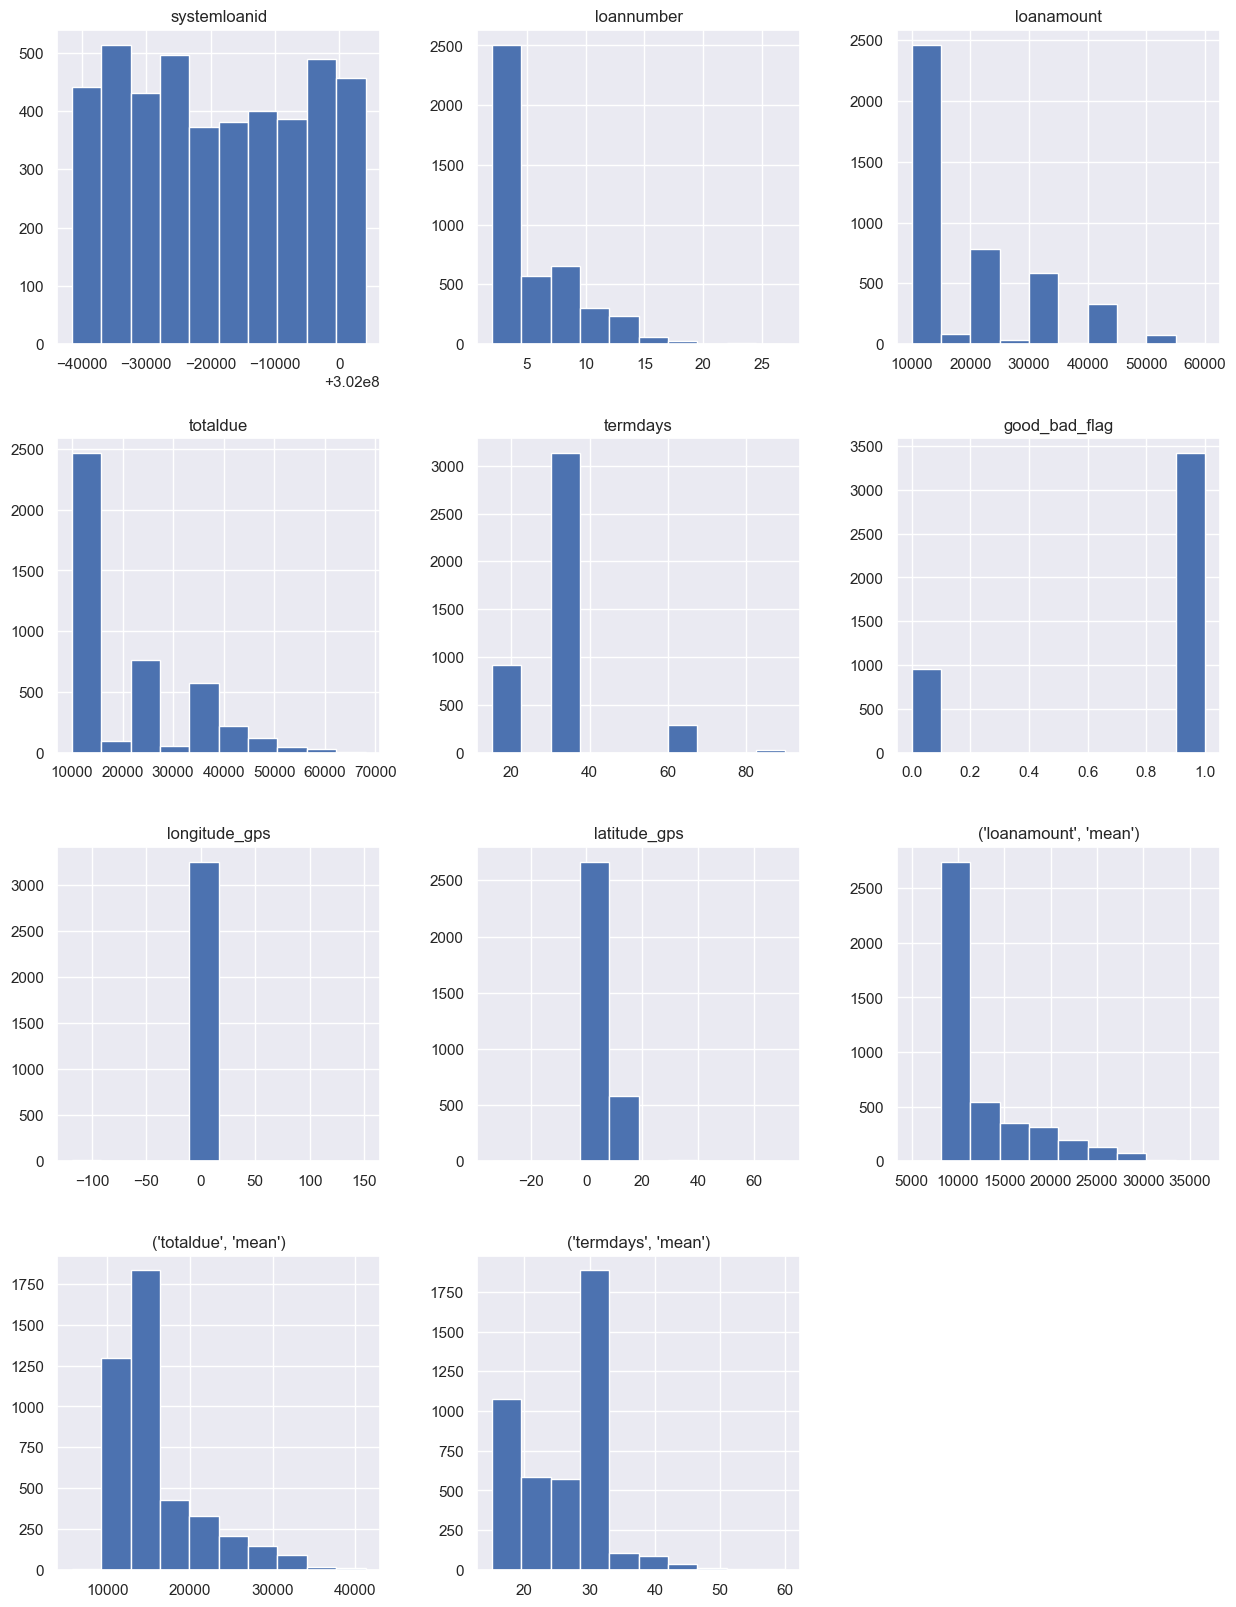

In [38]:
joined.hist(figsize=(15,20))

### Feature engineering 

<AxesSubplot: >

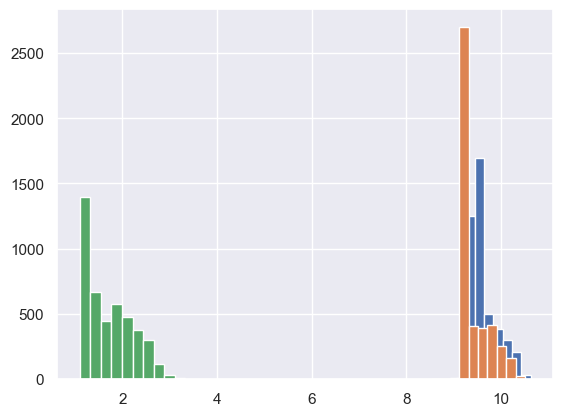

In [39]:
np.log(joined[('totaldue','mean')]+1).hist()
np.log(joined[('loanamount','mean')]+1).hist()
np.log(joined['loannumber']+1).hist()

In [40]:
joined[('totaldue','mean')]=np.log(joined[('totaldue','mean')]+1)
joined[('loanamount','mean')]=np.log(joined[('loanamount','mean')]+1)
joined['loannumber']=np.log(joined['loannumber']+1)
joined['totaldue']=np.log(joined['totaldue']+1)
joined['loanamount']=np.log(joined['loanamount']+1)

Slope: 9.210440366976517
Intercept: 9.432149721246583


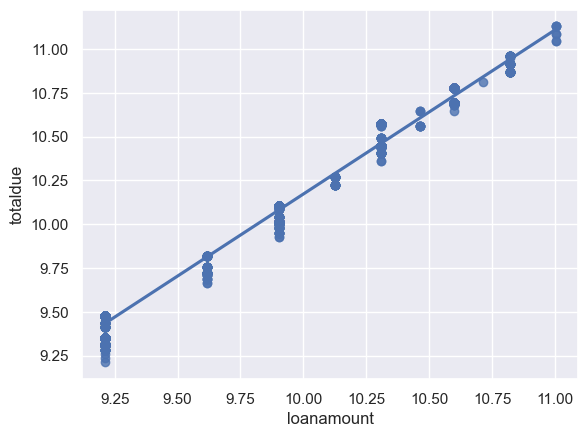

In [41]:
sns.regplot(x="loanamount",y="totaldue",data=joined,ci=None)
slope, intercept = plt.gca().lines[0].get_data()
print("Slope:", slope[0])
print("Intercept:", intercept[0])
# There is approximitly a linear relation even logically §§§§§So we will drop one of them

#### Train data 

In [42]:
#  approveddate
joined['approveddate'] = pd.to_datetime(joined['approveddate'])

joined['Year'] = joined['approveddate'].dt.year
joined['Month'] = joined['approveddate'].dt.month
joined['Day'] = joined['approveddate'].dt.day
joined['Hour'] = joined['approveddate'].dt.hour
joined['Minute'] = joined['approveddate'].dt.minute
joined['Second'] = joined['approveddate'].dt.second
#  creationdate
joined['creationdate'] = pd.to_datetime(joined['creationdate'])
joined['Hour_c'] = joined['creationdate'].dt.hour
joined['Minute_c'] = joined['creationdate'].dt.minute
joined['Second_c'] = joined['creationdate'].dt.second
#  birthdate
joined['birthdate'] = pd.to_datetime(joined['birthdate'])
joined['Year_B'] = joined['birthdate'].dt.year
joined['Month_B'] = joined['birthdate'].dt.month



In [43]:
#  monthly interest rate
joined['interest_per_month']=(joined['totaldue']-joined['loanamount'])/joined['termdays']

In [44]:
#  Age of the clients 
joined['Age']=joined['Year']-joined['Year_B']

#### Test data

In [46]:
joined_test

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,"(loanamount, mean)","(totaldue, mean)","(termdays, mean)"
0,8a858899538ddb8e015390510b321f08,301998974,4,40:48.0,39:35.0,10000,12250.0,30,NaN,1982-08-08 00:00:00.000000,Savings,NaN,NaN,GT Bank,OGBA,Permanent,Graduate,8666.666667,10966.666667,25.000000
1,8a858959537a097401537a4e316e25f7,301963615,10,43:40.0,42:34.0,40000,44000.0,30,NaN,1982-08-08 00:00:00.000000,Savings,NaN,NaN,GT Bank,OGBA,Permanent,Graduate,23888.888889,27600.000000,31.666667
2,8a8589c253ace09b0153af6ba58f1f31,301982236,6,15:11.0,15:04.0,20000,24500.0,30,NaN,1981-09-05 00:00:00.000000,Savings,3.227945,6.586668,UBA,OGBA,Permanent,Graduate,13000.000000,15935.000000,27.000000
3,8a858e095aae82b7015aae86ca1e030b,301971730,8,00:54.0,00:49.0,30000,34500.0,30,NaN,1982-08-08 00:00:00.000000,Savings,NaN,NaN,GT Bank,OGBA,Permanent,Graduate,17142.857143,19342.857143,17.142857
4,8a858e225a28c713015a30db5c48383d,301959177,4,04:33.0,04:27.0,20000,24500.0,30,NaN,1975-08-25 00:00:00.000000,Savings,5.248368,13.059864,UBA,OGBA,Permanent,Graduate,10000.000000,12500.000000,25.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,8a858fb45bb59c21015bb88a191f58f2,301991141,3,47:02.0,46:53.0,10000,11500.0,15,NaN,1982-08-08 00:00:00.000000,Savings,NaN,NaN,GT Bank,OGBA,Permanent,Graduate,10000.000000,11500.000000,15.000000
1446,8a858fcb5b00cc54015b0253ced26a5f,301963018,3,00:45.0,04:05.0,10000,13000.0,30,NaN,1982-08-08 00:00:00.000000,Savings,NaN,NaN,GT Bank,OGBA,Permanent,Graduate,10000.000000,11500.000000,15.000000
1447,8a858fde56eb02280156f59b976d46c0,301994653,9,09:40.0,09:33.0,40000,48000.0,60,NaN,1982-08-08 00:00:00.000000,Savings,NaN,NaN,GT Bank,OGBA,Permanent,Graduate,18125.000000,22075.000000,37.500000
1448,8a858e10570f2d65015717fcfec44996,301961483,14,47:54.0,46:49.0,60000,68100.0,90,NaN,1982-08-08 00:00:00.000000,Savings,NaN,NaN,GT Bank,OGBA,Permanent,Graduate,30384.615385,36084.615385,54.230769


In [49]:
#  birthdate
joined_test['birthdate'] = pd.to_datetime(joined_test['birthdate'])
joined_test['Year_B'] = joined_test['birthdate'].dt.year
joined_test['Month_B'] = joined_test['birthdate'].dt.month



In [51]:
joined_test['interest_per_month']=(joined_test['totaldue']-joined_test['loanamount'])/joined_test['termdays']

In [52]:
f=['interest_per_month','Age']
for i in f :
    chi_squared_test(joined, i, 'loanamount')

interest_per_month has a significant relationship with the  loanamount  variable.
Age does not have a significant relationship with the loanamount   variable.


In [53]:
f=['interest_per_month','Age']
for i in f :
    chi_squared_test(joined, i, 'good_bad_flag')

interest_per_month has a significant relationship with the  good_bad_flag  variable.
Age does not have a significant relationship with the good_bad_flag   variable.


In [54]:
drop=['approveddate','creationdate','birthdate'] #Feature to drop 

### Fisher test

#### H0: no association between the variables
#### H1: there is an association between the variables

In [55]:
import numpy as np
from scipy.stats import hypergeom

def fisher_exact_custom(contingency_table):
    table = np.array(contingency_table)
    n_rows, n_cols = table.shape
    if n_rows < 2 or n_cols < 2:
        raise ValueError("Contingency table must have at least 2 rows and 2 columns")
    total_obs = table.sum()
    min_rows_cols = min(n_rows, n_cols)
    p_value = 0.0
    for i in range(1, min_rows_cols + 1):
        for j in range(1, min_rows_cols + 1):
            if i <= n_rows and j <= n_cols:
                subtable_obs = table[:i, :j].sum()
                p_value += hypergeom.pmf(subtable_obs, total_obs, i, j)

    return p_value


 #### 1) We try for 'employment_status_clients' & 'level_of_education_clients'

In [56]:
contingency_table = pd.crosstab(joined['employment_status_clients'], joined['level_of_education_clients'])
contingency_table

level_of_education_clients,Graduate,Post-Graduate,Primary,Secondary
employment_status_clients,,,,
Contract,1,0,0,0
Permanent,3857,35,5,35
Retired,4,0,0,0
Self-Employed,239,10,2,26
Student,104,5,0,2
Unemployed,41,0,0,2


In [57]:
p_value = fisher_exact_custom(contingency_table)
print("P-value:", p_value)


P-value: 0.002289377289377289


#### p_value is less than 0.05 ,then we conclude that the  null hypothesis is rejected and there is a significant association between the variables.

 #### 2) We try for 'referredby' & 'bank_account_type'

In [58]:
contingency_table = pd.crosstab(joined['employment_status_clients'], joined['bank_account_type'])
contingency_table

bank_account_type,Current,Other,Savings
employment_status_clients,,,
Contract,1,0,0
Permanent,44,406,3482
Retired,0,2,2
Self-Employed,1,188,88
Student,0,43,68
Unemployed,0,14,29


In [59]:
p_value = fisher_exact_custom(contingency_table)
print("P-value:", p_value)

P-value: 0.0013736263736263735


#### The same for the second case p_value is less than 0.05 ,then we conclude that the  null hypothesis is rejected and there is a significant association between the variables.

### The Anova Test

#### H0: no difference between group means
#### H1:  there is a significant difference between at least one pair of group means.

In [60]:
group1 = joined[joined['bank_account_type'] == 'Savings']['loanamount']
group2 = joined[joined['bank_account_type'] == 'Other']['loanamount']
group3 = joined[joined['bank_account_type'] == 'Current']['loanamount']


In [61]:
from scipy.stats import f_oneway
# Perform ANOVA
statistic, p_value = f_oneway(group1, group2, group3)

# Print results
print("F-statistic:", statistic)
print("P-value:", p_value)


F-statistic: 310.02233125523935
P-value: 1.2673943953085132e-126


#### p_value is less than 0.05 ,then we conclude that the  null hypothesis is rejected and there is a significant association between the variables.

In [62]:
obj_col

Index(['customerid', 'approveddate', 'creationdate', 'referredby', 'birthdate',
       'bank_account_type', 'bank_name_clients', 'bank_branch_clients',
       'employment_status_clients', 'level_of_education_clients'],
      dtype='object')

In [63]:
joined = joined.drop(drop, axis=1)


## Data Encoding

In [64]:
employment_status_map = {"Permanent":0, "Self-Employed":1, "Student":2, "Unemployed":3, "Retired":4, "Contract":5, "UNK":6}
level_of_education_map = {"Graduate":0, "Secondary":1, "Post-Graduate":2, "Primary":3, "UNK":4}

joined["employment_status_clients"] = joined["employment_status_clients"].map(employment_status_map)
joined["level_of_education_clients"] = joined["level_of_education_clients"].map(level_of_education_map)

joined_test["employment_status_clients"] = joined_test["employment_status_clients"].map(employment_status_map)
joined_test["level_of_education_clients"] = joined_test["level_of_education_clients"].map(level_of_education_map)

In [65]:
obj_col=joined.select_dtypes(include='object').columns
joined=joined.join(pd.get_dummies(joined[obj_col].drop(['customerid',],axis=1)))\
                .drop(train_joined[obj_col],axis=1)
joined_test=joined_test.join(pd.get_dummies(joined_test[obj_col].drop(['customerid'],axis=1)))\
                .drop(joined_test[obj_col],axis=1)

### Custom function of PCA

In [66]:
def pca(X, n_components):
    # Remove rows with NaN values
    X = X[~np.isnan(X).any(axis=1)]
    
    # Center the data
    X_centered = X - np.mean(X, axis=0)
    
    # Check for infs after centering
    if np.any(np.isinf(X_centered)):
        raise ValueError("Data contains infinite values after centering.")
    
    # Compute the covariance matrix
    cov_matrix = np.cov(X_centered, rowvar=False)
    
    # Check for infs in the covariance matrix
    if np.any(np.isinf(cov_matrix)):
        raise ValueError("Covariance matrix contains infinite values.")
    
    # Perform eigendecomposition
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    
    # Sort eigenvectors based on eigenvalues
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    
    # Select the top n_components eigenvectors
    components = sorted_eigenvectors[:, :n_components]
    
    # Project the data onto the principal components
    projected_data = np.dot(X_centered, components)
    
    return projected_data, components, sorted_eigenvalues

# Example usage
np.random.seed(0)
X = joined.values  # Assuming 'joined' is your dataset
n_components = 2
projected_data, components, eigenvalues = pca(X, n_components)

# Output results
print("Original data shape:", X.shape)
print("Projected data shape:", projected_data.shape)
print("Components shape:", components.shape)
print("Eigenvalues:", eigenvalues)


Original data shape: (4368, 599)
Projected data shape: (3264, 2)
Components shape: (599, 2)
Eigenvalues: [ 1.80713941e+08+0.00000000e+00j  5.77984096e+02+0.00000000e+00j
  4.06464643e+02+0.00000000e+00j  1.96668424e+02+0.00000000e+00j
  1.46763346e+02+0.00000000e+00j  7.52017746e+01+0.00000000e+00j
  6.36348104e+01+0.00000000e+00j  4.72900205e+01+0.00000000e+00j
  2.97551789e+01+0.00000000e+00j  1.12600911e+01+0.00000000e+00j
  9.84329863e+00+0.00000000e+00j  8.10548757e+00+0.00000000e+00j
  3.38395990e+00+0.00000000e+00j  7.58237115e-01+0.00000000e+00j
  3.02726936e-01+0.00000000e+00j  2.63137600e-01+0.00000000e+00j
  2.12490785e-01+0.00000000e+00j  1.65855600e-01+0.00000000e+00j
  1.19497475e-01+0.00000000e+00j  1.14925077e-01+0.00000000e+00j
  9.18153231e-02+0.00000000e+00j  9.09227022e-02+0.00000000e+00j
  7.45219249e-02+0.00000000e+00j  6.63582102e-02+0.00000000e+00j
  5.42988307e-02+0.00000000e+00j  4.43238233e-02+0.00000000e+00j
  3.56517361e-02+0.00000000e+00j  2.94077708e-02+0

### Importing PCA from sklearn library

In [67]:
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import numpy as np

# Assuming X is your dataset
X = joined.values  # Replace 'joined' with your actual dataset

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Instantiate PCA with desired number of components
n_components = 2
pca = PCA(n_components=n_components)

# Fit PCA to your data
pca.fit(X_imputed)

# Transform the data onto the new feature space
projected_data = pca.transform(X_imputed)

# Access the principal components (eigenvectors)
components = pca.components_

# Access the explained variance ratio (eigenvalues)
explained_variance_ratio = pca.explained_variance_ratio_

# Output results
print("Original data shape:", X.shape)
print("Projected data shape:", projected_data.shape)
print("Components shape:", components.shape)
print("Explained variance ratio:", explained_variance_ratio)


Original data shape: (4368, 599)
Projected data shape: (4368, 2)
Components shape: (2, 599)
Explained variance ratio: [9.99991411e-01 3.23588439e-06]


#### Explained variance ratio is [9.99991411e-01, 3.23588439e-06] : indicates that the first principal component explains approximately 99.999% of the variance in the data, while the second principal component explains approximately 0.0003236% of the variance.

#### To conclude , i can delete the second component and only use the first one .

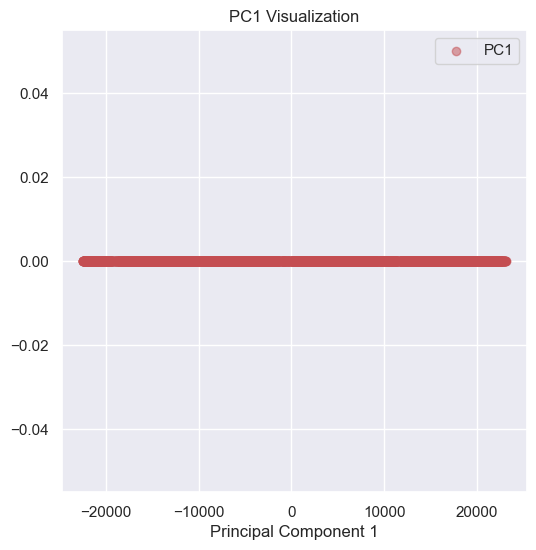

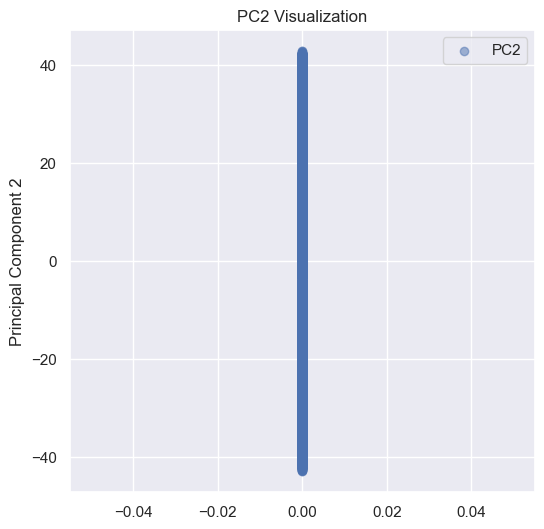

In [68]:
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# Assuming X is your dataset
X = joined.values  # Replace 'joined' with your actual dataset

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Instantiate PCA with desired number of components
pca = PCA(n_components=2)  # We'll use 2 components for visualization

# Fit PCA to your data
pca.fit(X_imputed)

# Transform the data onto the new feature space
projected_data = pca.transform(X_imputed)

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the data projected onto PC1
plt.figure(figsize=(6, 6))
plt.scatter(projected_data[:, 0], [0] * len(projected_data), alpha=0.5, label='PC1', color='r')
plt.xlabel('Principal Component 1')
plt.title('PC1 Visualization')
plt.legend()
plt.grid(True)
plt.show()

# Plot the data projected onto PC2
plt.figure(figsize=(6, 6))
plt.scatter([0] * len(projected_data), projected_data[:, 1], alpha=0.5, label='PC2', color='b')
plt.ylabel('Principal Component 2')
plt.title('PC2 Visualization')
plt.legend()
plt.grid(True)
plt.show()


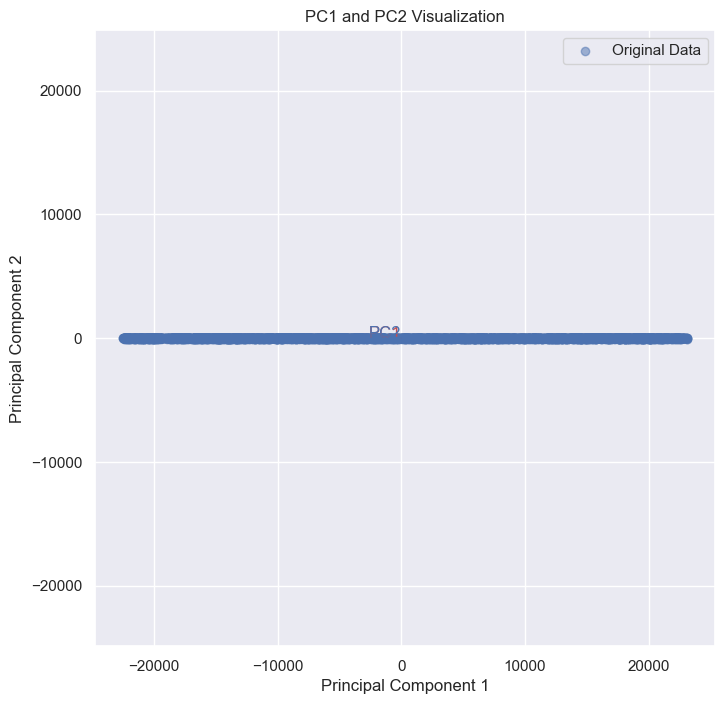

In [69]:
# Instantiate PCA with desired number of components
pca = PCA(n_components=2)  # We'll use 2 components for visualization

# Fit PCA to your data
pca.fit(X_imputed)

# Transform the data onto the new feature space
projected_data = pca.transform(X_imputed)

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the data projected onto PC1 and PC2 along with the principal component vectors
plt.figure(figsize=(8, 8))
plt.scatter(projected_data[:, 0], projected_data[:, 1], alpha=0.5, label='Original Data')
for i in range(2):
    plt.arrow(0, 0, pca.components_[i, 0] * explained_variance_ratio[i], pca.components_[i, 1] * explained_variance_ratio[i], 
              head_width=0.1, head_length=0.1, fc='r' if i == 0 else 'b', ec='r' if i == 0 else 'b')
    plt.text(pca.components_[i, 0] * explained_variance_ratio[i], pca.components_[i, 1] * explained_variance_ratio[i], 
             f'PC{i+1}', fontsize=12, ha='right', color='r' if i == 0 else 'b')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PC1 and PC2 Visualization')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


In [70]:
first_component = pca.transform(X_imputed)

In [71]:
new_joined=first_component

### Model 

### 1) CatBoostClassifier:

In [76]:
X=joined.drop(['good_bad_flag'],axis=1)
y=joined['good_bad_flag']

In [77]:
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid=train_test_split(X,y,test_size=0.2,random_state=42)

In [78]:
from catboost import CatBoostClassifier
model=CatBoostClassifier(random_state=42,max_depth=4,reg_lambda=2)
model.fit(X_train,y_train,eval_set=[(X_valid,y_valid)],verbose=300)

0:	learn: 0.6810119	test: 0.6823069	best: 0.6823069 (0)	total: 159ms	remaining: 2m 38s
300:	learn: 0.4530200	test: 0.5353637	best: 0.5339331 (265)	total: 1.27s	remaining: 2.96s
600:	learn: 0.4174375	test: 0.5350473	best: 0.5337984 (497)	total: 2.37s	remaining: 1.57s
900:	learn: 0.3870492	test: 0.5382842	best: 0.5337984 (497)	total: 3.36s	remaining: 369ms
999:	learn: 0.3775072	test: 0.5410005	best: 0.5337984 (497)	total: 3.7s	remaining: 0us

bestTest = 0.5337984395
bestIteration = 497

Shrink model to first 498 iterations.


In [79]:
from sklearn.metrics import accuracy_score,f1_score,classification_report
def evaluation(model,X,y):
    y_pred=model.predict(X)
    acc=accuracy_score(y,y_pred)
    f1=f1_score(y,y_pred,average='macro')
    print(f"Accuracy : {acc:.3f}")
    print(f"F1-Score : {f1:.3f}")
    print(classification_report(y, y_pred))

In [80]:
evaluation(model,X_train,y_train)

Accuracy : 0.802
F1-Score : 0.515
              precision    recall  f1-score   support

           0       0.97      0.08      0.14       746
           1       0.80      1.00      0.89      2748

    accuracy                           0.80      3494
   macro avg       0.88      0.54      0.51      3494
weighted avg       0.84      0.80      0.73      3494



###### We see here  the importance of the F1-score underscores a crucial aspect of model evaluation. While accuracy provides a straightforward measure of overall correctness, it can sometimes be misleading. A high accuracy might initially suggest that the model is performing well and on the right track. However, the F1-score, which takes into account both precision and recall, offers a more nuanced perspective. The F1-score, with its balanced consideration of precision and recall, offers a more reliable measure, revealing potential shortcomings that accuracy alone might overlook.

### 2) XGBClassifier

In [85]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train,y_train)
y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_valid)
evaluation(model,X_train,y_train)

Accuracy : 0.989
F1-Score : 0.983
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       746
           1       0.99      1.00      0.99      2748

    accuracy                           0.99      3494
   macro avg       0.99      0.97      0.98      3494
weighted avg       0.99      0.99      0.99      3494



#### The increase in the F1-score with the new model is a positive sign of potential improvement. However, upon closer examination, particularly regarding precision for the 'good_bad_flag' class labeled as '0', which shows a precision value of '1.00', we suspect overfitting. This perfect precision suggests that the model may be fitting too closely to the training data, potentially hindering its ability to generalize to unseen data. Detecting overfitting is critical as it can lead to inflated performance metrics during training but poor performance on new data. To address this, we may need to revisit the model architecture, regularization techniques, or dataset balancing methods to promote better generalization, ensuring effectiveness in real-world applications.